# Encoder-Decoder Analysis

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/reports/encdec_250_800_dr.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/logs/encdec_250_800_dr_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> output]
  (1): nn.LookupTable
  (2): nn.LSTM(250 -> 800)
  (3): nn.Dropout(0.500000)
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 5.5018499958222)
('Valid Perplexity: ', 27.312297195403)
('Test Perplexity: ', 25.383458037513)


### Loss vs. Epoch

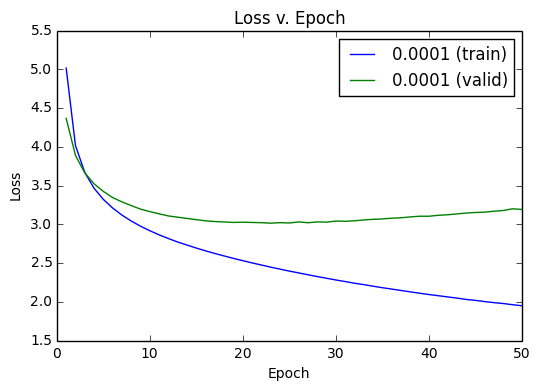

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

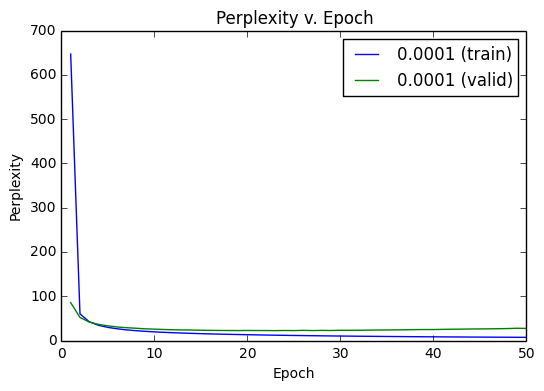

In [4]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    print('\n')
    

In [6]:
for sample in report['train_samples']:
    print_sample(sample)

Input:  churro waffles <begin_ingredients> 1.5 cups almond meal / flour <ing> ½ teaspoon baking soda <ing> ½ teaspoon cinnamon <ing> pinch of salt <ing> ⅓ cup canned coconut milk <ing> 2 eggs , whisked <ing> 1 tablespoon honey <ing> 1 teaspoon vanilla extract <ing> 3 tablespoons grass fed butter , melted ( or coconut oil if you don’t do butter ) <ing> ¼ - 1 / 3 cup coconut sugar <end>

Gend:  <beg> preheat the oven to 350 degrees . <step> in a large bowl , combine the flour , baking powder , salt , sugar , cinnamon , nutmeg , and cloves . <step> add the milk , vanilla , and milk . stir until the mixture is smooth . <step> pour the mixture into the prepared

True:  place almond flour , baking soda , cinnamon and salt in a bowl and whisk together . <step> then add coconut milk , eggs , honey , and vanilla extract and mix well . <step> place mixture into hot waffle iron and cook until cooked through . i used a non stick waffle iron but you may want to grease it just in case . <step> melt 

In [7]:
for sample in report['valid_samples']:
    print_sample(sample)

Input:  lemon syllabub <begin_ingredients> 1+ ½ cup heavy cream <ing> ¼ cup sugar <ing> 2 tablespoons apple juice <ing> juice of one lemon <ing> zest of one lemon <ing> ½ teaspoon vanilla <end>

Gend:  <beg> in a small bowl , combine the cream cheese , sugar , and salt . <step> whisk together the egg yolks , and the remaining ingredients . <step> pour the mixture into the prepared pan and bake for 35 - 40 minutes , or until the top is golden brown . <step> serve warm with

True:  zest and juice lemon . place all ingredients ( including lemon juice and zest ) in large mixing bowl . beat with an electric mixer , stopping to scrape down sides and stir from the bottom once , until thick and slightly stiff . <step> chill until ready to serve - serve same day . <end>



Input:  potato pancake <begin_ingredients> 5 teaspoons unsalted butter <ing> 4 cups frozen hash browns ( 1 pound ) , thawed <ing> coarse salt and ground pepper <ing> coarse salt and ground pepper <end>

Gend:  <beg> in a larg

In [8]:
for sample in report['test_samples']:
    print_sample(sample)

Input:  vegan celery root mashed potatoes <begin_ingredients> 1 celery root , diced <ing> 4 small or 2 large idaho potatoes , peeled and diced <ing> 1 / 4 cup olive oil , plus more to taste <ing> kosher salt <ing> chopped fresh parsley , for serving <end>

Gend:  <beg> in a large bowl , combine the cream cheese , sour cream , mayonnaise , garlic , salt , pepper and lemon juice . <step> mix well and set aside . <step> in a large bowl , combine the tomatoes , tomatoes , olives , olives , olives , onion , parsley , salt and

True:  1 . put the celery root and potatoes in a saucepan . cover with 1 inch of water . bring to a boil and then simmer until tender , about 20 minutes depending on the size of the dice . <step> 2 . drain the water from the celery root and potatoes . add the olive oil and use a potato masher until you reach your desired chunkiness level . season with salt and add more olive oil as desired . <step> 3 . transfer to a bowl , drizzle a little extra olive oil on top , and

### BLEU Analysis

In [9]:
print 'Overall Score: ', report['bleu']['score'], '\n'
print '1-gram Score: ', report['bleu']['components']['1']
print '2-gram Score: ', report['bleu']['components']['2']
print '3-gram Score: ', report['bleu']['components']['3']
print '4-gram Score: ', report['bleu']['components']['4']

Overall Score:  0.05 

1-gram Score:  39.1
2-gram Score:  8.7
3-gram Score:  1.2
4-gram Score:  0.4
